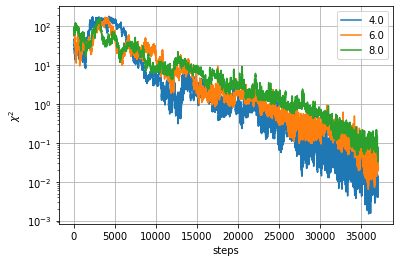

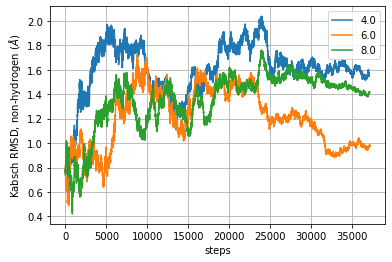

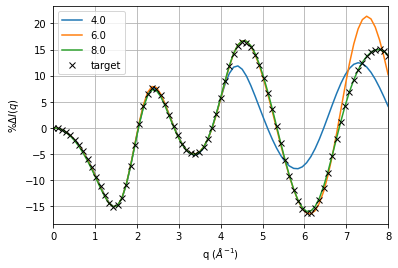

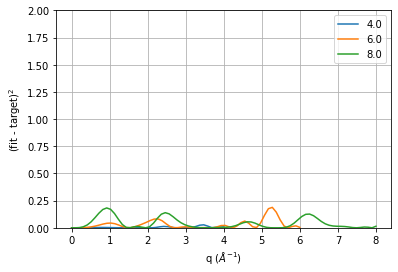

In [14]:
import numpy as np
import matplotlib.pyplot as p

title = 'nmm'
plot_bool = True
png_plot = True
png_plot_rmsd = False

stepsize_list=(0.01, 0.1, 0.2, 0.5, 1.0)
stepsize_list=[0.1]
qmax_list=(4.0, 6.0, 8.0)
#qmax_list=[4.0]
t0_list=[1.0]
N = 50000
nruns_list = (100, 200, 500)
nruns_list = [100]
qvector8 = np.linspace(0, 8, 79, endpoint=True)
for runs in nruns_list:
    for qq in qmax_list:
        for t0 in t0_list:
            for ds in stepsize_list:
                data_file = ('%s_data/data_%s_qmax_%2.1f_T0_%2.1f_ds_%2.1f_N_%i_Nruns_%i.npz' 
                            % (title, title, qq, t0, ds, N, Nruns))
                f = np.load(data_file)
                target_pcd = f['target_pcd']
                chi2_path = f['chi2_path']
                rmsd_path = f['rmsd_path']
                final_pcd = f['final_pcd']
                final_pcd_q8 = f['final_pcd_q8']
                final_xyz = f['final_xyz']
                counts_array = f['counts']
                step_size = f['step_size']
                noise_factor = f['noise_factor']
                qvector = f['qvector']
                qmax = qvector[-1]
                nruns = f['nruns']

                if plot_bool:
                    # chi2 plot
                    p.figure(1)
                    p.semilogy(chi2_path)
                    # RMSD plot
                    p.figure(2)
                    p.plot(rmsd_path)                   
                    # pcd plot
                    p.figure(3)
                    p.plot(qvector8, final_pcd_q8)
                    p.figure(4)
                    p.plot(qvector, (final_pcd - target_pcd)**2)

p.figure(1)
p.grid()
p.xlabel('steps')
p.ylabel('$\chi^2$')
#p.legend(stepsize_list)
p.legend(qmax_list)
if png_plot:
    fname = ('%s_chi2_vary_stepsize_qmax_%2.1f.png' % 
          (title, qmax))
    fname = '%s_chi2_vary_qmax.png' % title
    p.savefig(fname, dpi=300, facecolor='w', 
            edgecolor='w', orientation='portrait', 
            format='png', transparent=False, 
            bbox_inches='tight', pad_inches=0.1, 
            metadata=None)
p.figure(2)
p.grid()
p.xlabel('steps')
p.ylabel(r'Kabsch RMSD, non-hydrogen $(\AA)$')
#p.legend(stepsize_list)
p.legend(qmax_list)
if png_plot_rmsd:
    fname = '%s_rmsd_vary_stepsize_%2.1f_qmax_%2.1f.png'
    fname = '%s_rmsd_vary_qmax.png' % title
    p.savefig(fname, dpi=300, facecolor='w', 
        edgecolor='w', orientation='portrait', 
        format='png', transparent=False, 
        bbox_inches='tight', pad_inches=0.1, 
        metadata=None)

p.figure(3)
p.plot(qvector, target_pcd, 'kx')
p.xlabel('q $(\AA^{-1})$')
p.ylabel('%$\Delta I(q)$')
#p.legend((stepsize_list,) + ('target',))
p.legend(qmax_list + ('target',))
p.xlim((0, 8))
p.grid()
if png_plot:
    #fname = '%s_pcd_vary_stepsize_qmax_%2.1f.png' % ((title, qmax))
    fname = '%s_pcd_vary_qmax.png' % title
    p.savefig(fname, dpi=300, facecolor='w', 
        edgecolor='w', orientation='portrait', 
        format='png', transparent=False, 
        bbox_inches='tight', pad_inches=0.1, 
        metadata=None)
    
p.figure(4)
p.xlabel('q $(\AA^{-1})$')
p.ylabel('(fit - target)$^2$')
p.ylim((0, 2))
#p.legend(stepsize_list)
p.legend(qmax_list)
p.grid()

In [2]:
import numpy as np

f = np.load('chd_data/data_chd_stepsize_0.01_qmax_4.0_noise_0.00.npz')
f.files
print(f['final_xyz'])

[[ 0.33194237 -1.72815955  0.1868824 ]
 [ 0.97008627  0.67327649  0.09868205]
 [ 0.79607907  2.03908271 -0.0860374 ]
 [-0.16079626  1.13172447  0.06716642]
 [-1.01583509  0.2478809   0.03950013]
 [-0.92066988 -2.16925848 -0.18904564]
 [ 1.01315169 -2.305289    1.32108458]
 [ 1.715251   -3.57691004 -0.32595771]
 [ 2.00045724  1.38669164 -0.08435534]
 [ 1.47416641  2.89274831 -0.45577053]
 [-0.93359939  2.06564204  0.59124484]
 [-2.09173471  2.49720525  0.31835509]
 [-1.7079807  -2.81552465 -1.07162353]
 [-1.50166348 -3.09772861  0.56287518]]
